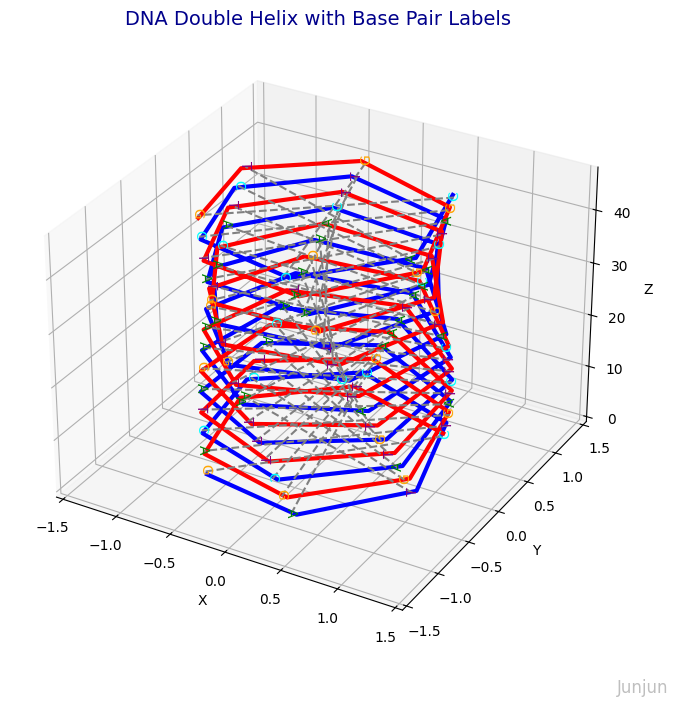

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Base pair sequence
sequence = "GATTCCCCAAAAATGCAAAAATAAGGCAAAAATGCCAAAAATCCCAC"  # Provided sequence
complement = "".join({'A': 'T', 'T': 'A', 'G': 'C', 'C': 'G'}[b] for b in sequence)

# Parameters for the nucleic acid double helix animation
num_base_pairs = len(sequence)
helix_radius = 1.0    # Radius of each helix strand
helix_pitch = 2.0     # Pitch (vertical distance between loops)
unwind_speed = 0.02   # Slower unwind speed for clarity
twist_angle = np.radians(5)  # Reduced twist angle for better clarity

# Generate coordinates for the DNA strands
z = np.linspace(0, num_base_pairs, num_base_pairs)
x1 = helix_radius * np.cos(z)   # X-coordinates for strand 1
y1 = helix_radius * np.sin(z)   # Y-coordinates for strand 1
x2 = helix_radius * np.cos(z + np.pi)  # X-coordinates for strand 2 (shifted by 180 degrees)
y2 = helix_radius * np.sin(z + np.pi)  # Y-coordinates for strand 2

# Set up the figure and 3D axis
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
line1, = ax.plot([], [], [], lw=3, color='blue', label="Strand 1")  # Thicker line
line2, = ax.plot([], [], [], lw=3, color='red', label="Strand 2")   # Thicker line
base_pairs = [ax.plot([], [], [], lw=1.5, color='gray', linestyle="--")[0] for _ in range(num_base_pairs)]
base_labels = [ax.text(0, 0, 0, "", ha='center', fontsize=10, color='black') for _ in range(num_base_pairs * 2)]

# Configure axis limits and labels
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(0, num_base_pairs)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("DNA Double Helix with Base Pair Labels", fontsize=14, color='darkblue')

# Add the watermark text in the bottom-right corner
fig.text(0.95, 0.05, "Junjun", ha='right', va='bottom', fontsize=12, color='gray', alpha=0.5)

# Color mapping for base pairs
base_colors = {'A': 'green', 'T': 'purple', 'G': 'orange', 'C': 'cyan'}

# Initialize the animation lines and labels
def init():
    line1.set_data([], [])
    line1.set_3d_properties([])
    line2.set_data([], [])
    line2.set_3d_properties([])
    for base_pair in base_pairs:
        base_pair.set_data([], [])
        base_pair.set_3d_properties([])
    for label in base_labels:
        label.set_position((0, 0))
        label.set_3d_properties(0, zdir='z')
        label.set_text("")
    return line1, line2, *base_pairs, *base_labels

# Animate function to update the helix, base pairs, and labels
def animate(i):
    # Calculate the unwind amount
    unwind_amount = unwind_speed * i
    x1_rotated = helix_radius * np.cos(z + unwind_amount)
    y1_rotated = helix_radius * np.sin(z + unwind_amount)
    x2_rotated = helix_radius * np.cos(z + unwind_amount + np.pi)
    y2_rotated = helix_radius * np.sin(z + unwind_amount + np.pi)

    # Update the strands
    line1.set_data(x1_rotated, y1_rotated)
    line1.set_3d_properties(z)
    line2.set_data(x2_rotated, y2_rotated)
    line2.set_3d_properties(z)

    # Update the base pairs (representing hydrogen bonds) with propeller twist
    for j, base_pair in enumerate(base_pairs):
        # Calculate a small rotation for propeller twist based on twist angle
        twist = twist_angle * np.sin(i * 0.05)  # Slow sinusoidal twist for clarity
        x1_twist = x1_rotated[j] * np.cos(twist) - y1_rotated[j] * np.sin(twist)
        y1_twist = x1_rotated[j] * np.sin(twist) + y1_rotated[j] * np.cos(twist)
        x2_twist = x2_rotated[j] * np.cos(twist) - y2_rotated[j] * np.sin(twist)
        y2_twist = x2_rotated[j] * np.sin(twist) + y2_rotated[j] * np.cos(twist)

        # Update each base pair with the twist
        base_pair.set_data([x1_twist, x2_twist], [y1_twist, y2_twist])
        base_pair.set_3d_properties([z[j], z[j]])

        # Update base pair labels with twist and color
        base_labels[2 * j].set_position((x1_twist, y1_twist))
        base_labels[2 * j].set_3d_properties(z[j], zdir='z')
        base_labels[2 * j].set_text(sequence[j])  # Label for strand 1
        base_labels[2 * j].set_color(base_colors[sequence[j]])

        base_labels[2 * j + 1].set_position((x2_twist, y2_twist))
        base_labels[2 * j + 1].set_3d_properties(z[j], zdir='z')
        base_labels[2 * j + 1].set_text(complement[j])  # Label for strand 2
        base_labels[2 * j + 1].set_color(base_colors[complement[j]])

    return line1, line2, *base_pairs, *base_labels

# Create the animation and save as an MP4 file
writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani = FuncAnimation(fig, animate, init_func=init, frames=200, interval=50, blit=True)

# Save the animation as a video file with watermark and base pair labels
ani.save("DNA_double_helix_clear.mp4", writer=writer)
plt.show()
